# Titanic Project

Problem Statement:

 The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. It gives you information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster. Based on these features, you have to predict if an arbitrary passenger on Titanic would survive the sinking or not. 

In [6]:
import pandas as pd
import numpy as np

In [2]:
url='https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv'
df=pd.read_csv(url)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Encoding Data Frame

In [10]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [12]:
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=le.fit_transform(df[i].values.reshape(-1,1))
df

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,108,1,22.000000,1,0,523,7.2500,147,2
1,2,1,1,190,0,38.000000,1,0,596,71.2833,81,0
2,3,1,3,353,0,26.000000,0,0,669,7.9250,147,2
3,4,1,1,272,0,35.000000,1,0,49,53.1000,55,2
4,5,0,3,15,1,35.000000,0,0,472,8.0500,147,2
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,548,1,27.000000,0,0,101,13.0000,147,2
887,888,1,1,303,0,19.000000,0,0,14,30.0000,30,2
888,889,0,3,413,0,29.699118,1,2,675,23.4500,147,2
889,890,1,1,81,1,26.000000,0,0,8,30.0000,60,0


# Checking Null Values in DataFrame

In [13]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [16]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name             int64
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Ticket           int64
Fare           float64
Cabin            int64
Embarked         int64
dtype: object

# Visualization of Data

In [14]:
import seaborn as sns

<AxesSubplot:xlabel='PassengerId', ylabel='Count'>

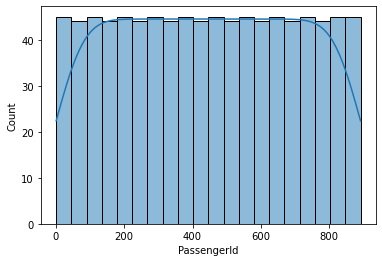

In [15]:
sns.histplot(x='PassengerId',data=df,bins=20,kde=True)

0    549
1    342
Name: Survived, dtype: int64


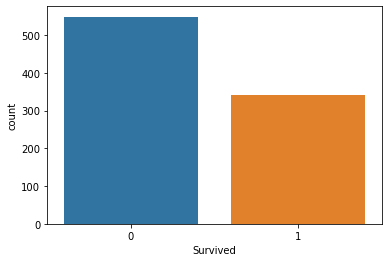

In [18]:
sns.countplot(x='Survived',data=df)
print(df['Survived'].value_counts())

3    491
1    216
2    184
Name: Pclass, dtype: int64


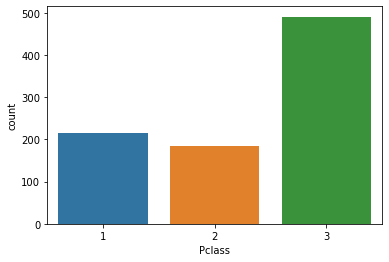

In [19]:
sns.countplot(x='Pclass',data=df)
print(df['Pclass'].value_counts())

<AxesSubplot:xlabel='Name', ylabel='Count'>

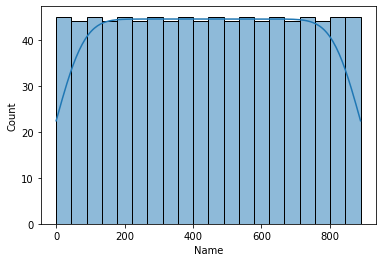

In [20]:
sns.histplot(x='Name',data=df,bins=20,kde=True)

1    577
0    314
Name: Sex, dtype: int64


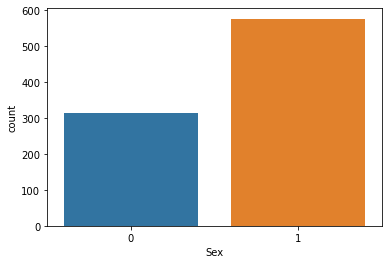

In [21]:
sns.countplot(x='Sex',data=df)
print(df['Sex'].value_counts())

<AxesSubplot:xlabel='Age', ylabel='Count'>

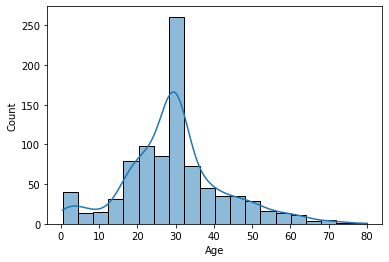

In [22]:
sns.histplot(x='Age',data=df,bins=20,kde=True)

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


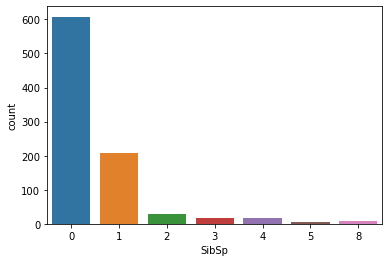

In [23]:
sns.countplot(x='SibSp',data=df)
print(df['SibSp'].value_counts())

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


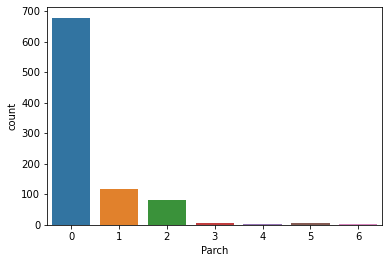

In [24]:
sns.countplot(x='Parch',data=df)
print(df['Parch'].value_counts())

<AxesSubplot:xlabel='Ticket', ylabel='Count'>

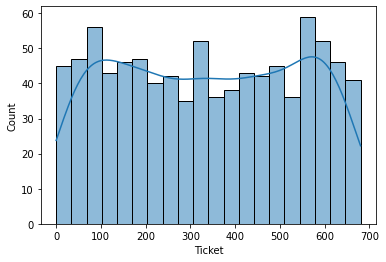

In [25]:
sns.histplot(x='Ticket',data=df,bins=20,kde=True)

<AxesSubplot:xlabel='Fare', ylabel='Count'>

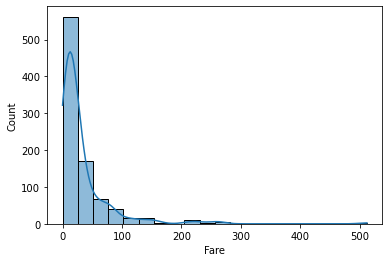

In [26]:
sns.histplot(x='Fare',data=df,kde=True,bins=20)

<AxesSubplot:xlabel='Cabin', ylabel='Count'>

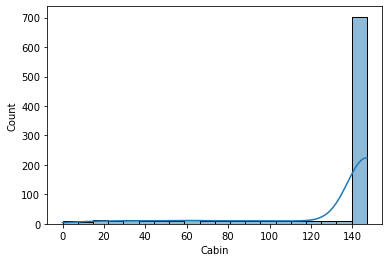

In [27]:
sns.histplot(x='Cabin',data=df,kde=True,bins=20)

2    644
0    168
1     77
3      2
Name: Embarked, dtype: int64


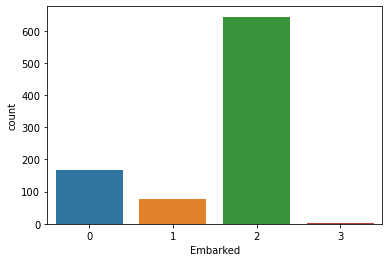

In [28]:
sns.countplot(x='Embarked',data=df)
print(df['Embarked'].value_counts())

# Describing Datasets

In [29]:
df.describe()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,445.000000,0.647587,29.699118,0.523008,0.381594,338.528620,32.204208,130.744108,1.538721
std,257.353842,0.486592,0.836071,257.353842,0.477990,13.002015,1.102743,0.806057,200.850657,49.693429,36.024237,0.794231
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,222.500000,0.000000,22.000000,0.000000,0.000000,158.500000,7.910400,147.000000,1.000000
50%,446.000000,0.000000,3.000000,445.000000,1.000000,29.699118,0.000000,0.000000,337.000000,14.454200,147.000000,2.000000
75%,668.500000,1.000000,3.000000,667.500000,1.000000,35.000000,1.000000,0.000000,519.500000,31.000000,147.000000,2.000000
max,891.000000,1.000000,3.000000,890.000000,1.000000,80.000000,8.000000,6.000000,680.000000,512.329200,147.000000,3.000000


In [30]:
import matplotlib.pyplot as plt

<AxesSubplot:>

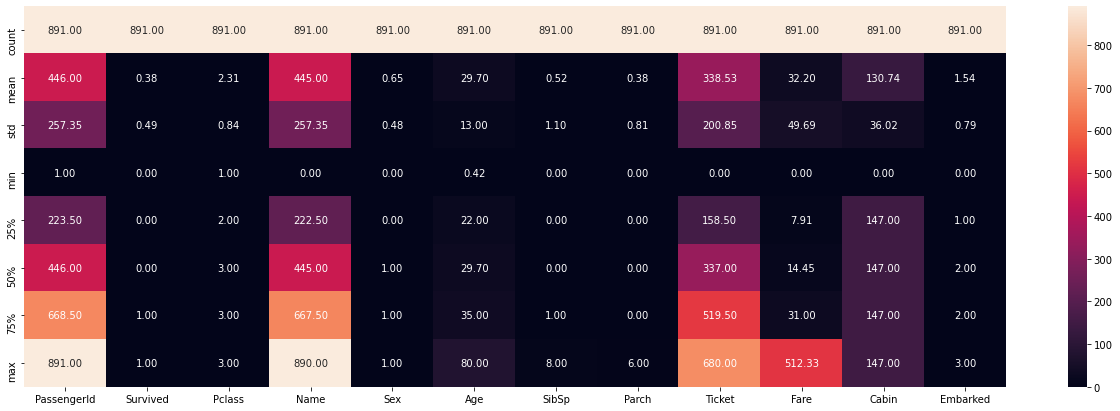

In [31]:
plt.figure(figsize=(22,7))
sns.heatmap(df.describe(),annot=True,data=df,fmt='0.2f')

# Correlation of Datasets

In [32]:
df.corr()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,1.000000,-0.005007,-0.035144,-0.038559,0.042939,0.033207,-0.057527,-0.001652,-0.056554,0.012658,-0.035077,0.013083
Survived,-0.005007,1.000000,-0.338481,-0.057343,-0.543351,-0.069809,-0.035322,0.081629,-0.164549,0.257307,-0.254888,-0.163517
Pclass,-0.035144,-0.338481,1.000000,0.052831,0.131900,-0.331339,0.083081,0.018443,0.319869,-0.549500,0.684121,0.157112
Name,-0.038559,-0.057343,0.052831,1.000000,0.020314,0.057466,-0.017230,-0.049105,0.047348,-0.049173,0.061959,-0.004557
Sex,0.042939,-0.543351,0.131900,0.020314,1.000000,0.084153,-0.114631,-0.245489,0.059372,-0.182333,0.096681,0.104057
Age,0.033207,-0.069809,-0.331339,0.057466,0.084153,1.000000,-0.232625,-0.179191,-0.068848,0.091566,-0.235406,-0.022239
SibSp,-0.057527,-0.035322,0.083081,-0.017230,-0.114631,-0.232625,1.000000,0.414838,0.079461,0.159651,0.043593,0.066654
Parch,-0.001652,0.081629,0.018443,-0.049105,-0.245489,-0.179191,0.414838,1.000000,0.020003,0.216225,-0.028324,0.038322
Ticket,-0.056554,-0.164549,0.319869,0.047348,0.059372,-0.068848,0.079461,0.020003,1.000000,-0.013885,0.243696,-0.006041
Fare,0.012658,0.257307,-0.549500,-0.049173,-0.182333,0.091566,0.159651,0.216225,-0.013885,1.000000,-0.503355,-0.221226


<AxesSubplot:>

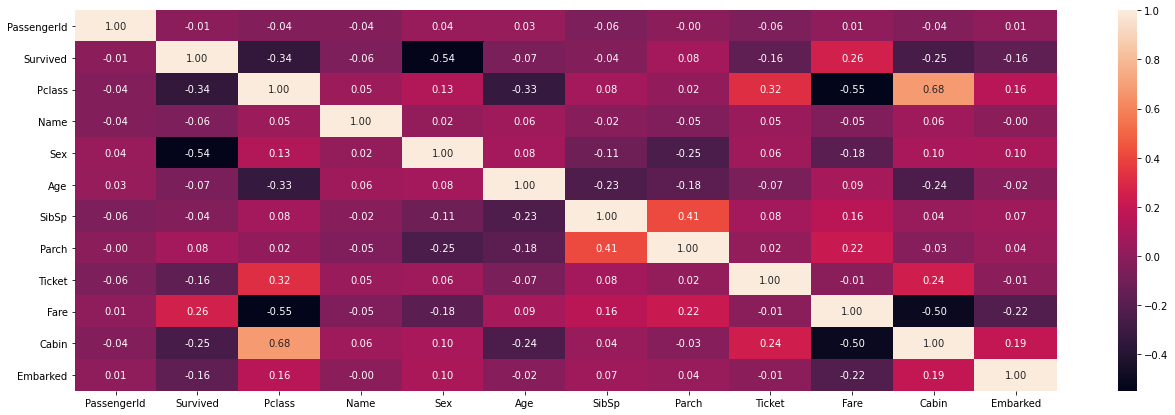

In [33]:
plt.figure(figsize=(22,7))
sns.heatmap(df.corr(),annot=True,data=df,fmt='0.2f')

Checking positive and negative correlation

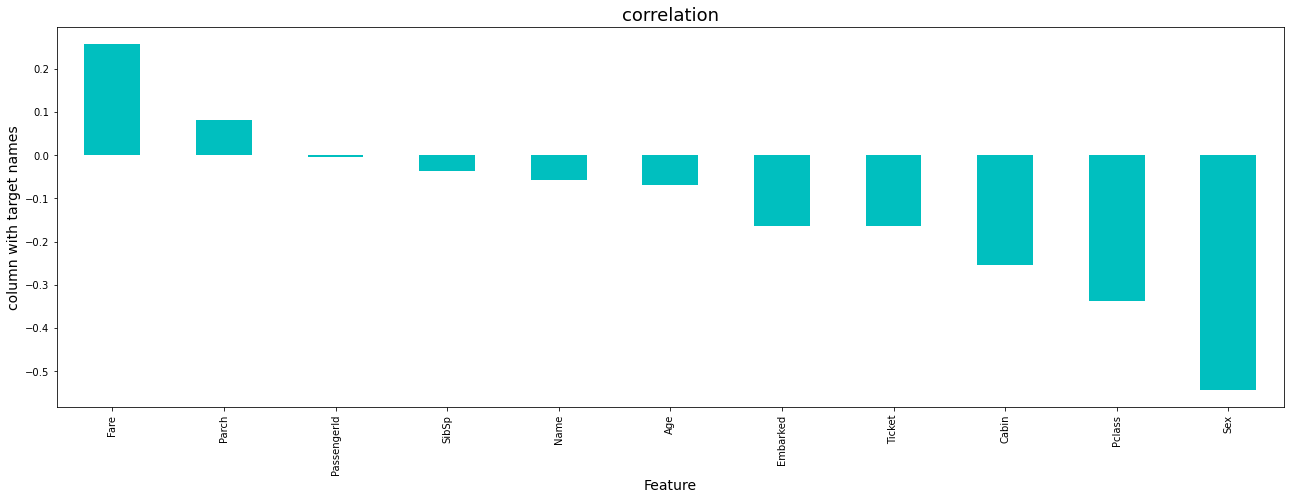

In [34]:
plt.figure(figsize=(22,7))
df.corr()['Survived'].sort_values(ascending=False).drop(['Survived']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

In [35]:
df.skew()

PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Name           0.000000
Sex           -0.618921
Age            0.434488
SibSp          3.695352
Parch          2.749117
Ticket         0.000246
Fare           4.787317
Cabin         -2.167313
Embarked      -1.246689
dtype: float64

-/+ 0.5 as the threshold

# Checking outliers

<AxesSubplot:>

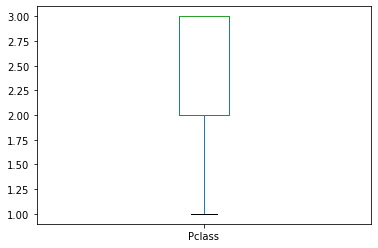

In [36]:
df['Pclass'].plot.box()

<AxesSubplot:>

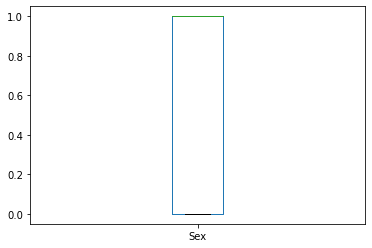

In [37]:
df['Sex'].plot.box()

<AxesSubplot:>

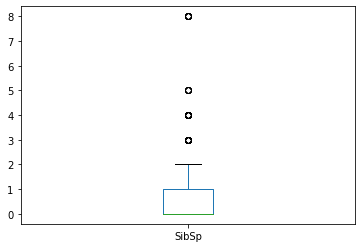

In [38]:
df['SibSp'].plot.box()

<AxesSubplot:>

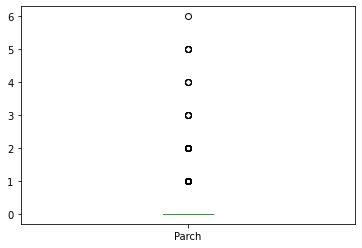

In [39]:
df['Parch'].plot.box()

<AxesSubplot:>

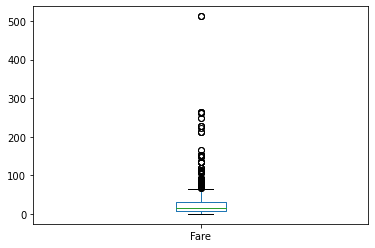

In [40]:
df['Fare'].plot.box()

<AxesSubplot:>

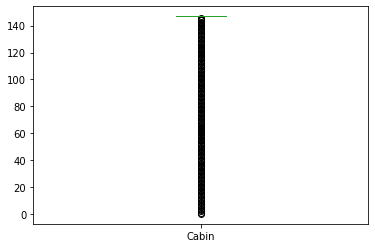

In [41]:
df['Cabin'].plot.box()

<AxesSubplot:>

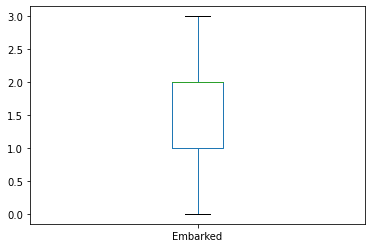

In [42]:
df['Embarked'].plot.box()

# Considering the outlier removal

In [45]:
df.shape

(891, 12)

In [44]:
from scipy.stats import zscore

In [46]:
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([ 13,  16,  23,  25,  27,  50,  59,  61,  68,  71,  86,  88,  96,
         96, 116, 118, 119, 159, 164, 167, 170, 171, 174, 180, 182, 185,
        201, 209, 233, 258, 261, 266, 278, 284, 299, 311, 324, 329, 341,
        360, 377, 380, 386, 437, 438, 438, 445, 475, 480, 493, 523, 527,
        540, 541, 542, 556, 557, 567, 583, 599, 610, 630, 630, 638, 647,
        672, 678, 679, 683, 686, 689, 690, 700, 716, 730, 736, 737, 737,
        742, 745, 745, 774, 779, 779, 781, 787, 792, 806, 813, 815, 824,
        829, 846, 850, 851, 858, 863, 867, 885]),
 array([ 7,  6, 10,  7,  9,  6,  6, 10,  6,  6,  7,  9,  5, 10,  5,  9,  6,
         6,  6,  7, 10,  6, 10,  6,  6, 10,  6, 10,  6,  9,  6,  6,  6, 10,
         9,  9,  6, 10,  9,  7,  9,  9,  6,  7,  7,  9, 10, 10,  6,  5, 10,
         9, 10,  6,  6, 10,  9,  7, 10, 10,  7,  5, 10,  7, 10,  5,  7,  9,
         6,  6,  9, 10,  9,  9,  9,  7,  9, 10,  9,  5, 10,  7,  9, 10, 10,
         6,  6, 10,  6, 10,  6, 10,  6,  6,  5,  7,  6, 10,

In [47]:
df_new=df[(z<3).all(axis=1)]
df_new

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,108,1,22.000000,1,0,523,7.2500,147,2
1,2,1,1,190,0,38.000000,1,0,596,71.2833,81,0
2,3,1,3,353,0,26.000000,0,0,669,7.9250,147,2
3,4,1,1,272,0,35.000000,1,0,49,53.1000,55,2
4,5,0,3,15,1,35.000000,0,0,472,8.0500,147,2
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,548,1,27.000000,0,0,101,13.0000,147,2
887,888,1,1,303,0,19.000000,0,0,14,30.0000,30,2
888,889,0,3,413,0,29.699118,1,2,675,23.4500,147,2
889,890,1,1,81,1,26.000000,0,0,8,30.0000,60,0


Percentage Data loss

In [53]:
Data_loss=((891-798)/891)*100
Data_loss

10.437710437710438

# Separating dataset into x and y

In [54]:
x=df.drop('Survived',axis=1)
y=df['Survived']

# Transforming dataset

In [55]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')
x

array([[-2.14814111,  0.86397329, -1.351096  , ..., -0.87882001,
         0.50466418,  0.58857363],
       [-2.13183003, -1.45912855, -0.93828827, ...,  1.33665056,
        -2.04790589, -1.76734807],
       [-2.117043  ,  0.86397329, -0.24765444, ..., -0.79006485,
         0.50466418,  0.58857363],
       ...,
       [ 1.55071925,  0.86397329, -0.01877308, ...,  0.28888536,
         0.50466418,  0.58857363],
       [ 1.55371741, -1.45912855, -1.50551816, ...,  0.52790578,
        -2.21989764, -1.76734807],
       [ 1.5567146 ,  0.86397329, -0.80116669, ..., -0.81234947,
         0.50466418, -1.17740874]])

In [56]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[-2.14814111,  0.86397329, -1.351096  , ..., -0.87882001,
         0.50466418,  0.58857363],
       [-2.13183003, -1.45912855, -0.93828827, ...,  1.33665056,
        -2.04790589, -1.76734807],
       [-2.117043  ,  0.86397329, -0.24765444, ..., -0.79006485,
         0.50466418,  0.58857363],
       ...,
       [ 1.55071925,  0.86397329, -0.01877308, ...,  0.28888536,
         0.50466418,  0.58857363],
       [ 1.55371741, -1.45912855, -1.50551816, ...,  0.52790578,
        -2.21989764, -1.76734807],
       [ 1.5567146 ,  0.86397329, -0.80116669, ..., -0.81234947,
         0.50466418, -1.17740874]])

# Model Selection

In [57]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [59]:
for i in range(0,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print("At random state",i,"The model performs very well")
        print("At random state :-",i)
        print("Training accuracy_score is :-", accuracy_score(y_train,pred_train)*100)
        print("Testing accuracy_score is :-",accuracy_score(y_test,pred_test)*100)
              

At random state 100 The model performs very well
At random state :- 100
Training accuracy_score is :- 81.03932584269663
Testing accuracy_score is :- 81.00558659217877
At random state 163 The model performs very well
At random state :- 163
Training accuracy_score is :- 81.03932584269663
Testing accuracy_score is :- 81.00558659217877
At random state 171 The model performs very well
At random state :- 171
Training accuracy_score is :- 79.91573033707866
Testing accuracy_score is :- 79.88826815642457
At random state 267 The model performs very well
At random state :- 267
Training accuracy_score is :- 79.91573033707866
Testing accuracy_score is :- 79.88826815642457
At random state 412 The model performs very well
At random state :- 412
Training accuracy_score is :- 81.03932584269663
Testing accuracy_score is :- 81.00558659217877
At random state 485 The model performs very well
At random state :- 485
Training accuracy_score is :- 81.03932584269663
Testing accuracy_score is :- 81.0055865921787

In [61]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       115
           1       0.76      0.58      0.65        64

    accuracy                           0.78       179
   macro avg       0.77      0.74      0.75       179
weighted avg       0.78      0.78      0.77       179



# Cross Validation for Logistic Regression

In [62]:
pred_lr=lr.predict(x_test)
from sklearn.model_selection import cross_val_score
lss=accuracy_score(y_test,pred_lr)
for j in range(2,10):
    lsscore=cross_val_score(lr,x,y,cv=j)
    lsc=lsscore.mean()
    print("At cv :- ",j)
    print("Cross validation score is :-",lsc*100)
    print("accuracy_score is :-",lss*100)
    print("\n")

At cv :-  2
Cross validation score is :- 78.00347659595909
accuracy_score is :- 78.2122905027933


At cv :-  3
Cross validation score is :- 78.90011223344557
accuracy_score is :- 78.2122905027933


At cv :-  4
Cross validation score is :- 79.2383751464469
accuracy_score is :- 78.2122905027933


At cv :-  5
Cross validation score is :- 79.01136149645346
accuracy_score is :- 78.2122905027933


At cv :-  6
Cross validation score is :- 80.46738013180965
accuracy_score is :- 78.2122905027933


At cv :-  7
Cross validation score is :- 79.5714988751406
accuracy_score is :- 78.2122905027933


At cv :-  8
Cross validation score is :- 80.01729407979408
accuracy_score is :- 78.2122905027933


At cv :-  9
Cross validation score is :- 79.7979797979798
accuracy_score is :- 78.2122905027933




In [63]:
lsscore_selected=cross_val_score(lr,x,y,cv=2).mean()
print("The cv score is: ",lsscore_selected,"\n The accuracy_score is: ",lss)


The cv score is:  0.7800347659595909 
 The accuracy_score is:  0.7821229050279329


# AUC ROC Curve

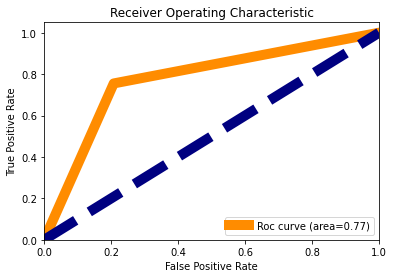

In [64]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds=roc_curve(pred_test,y_test)
roc_auc=auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label='Roc curve (area=%0.2f)' %roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Model Saving

In [65]:
import pickle
filename='Titanic.pk1'
pickle.dump(lr,open(filename,'wb'))

# Conclusion:

In [66]:
import numpy as np
a=np.array(y_test)
predicted=np.array(lr.predict(x_test))
df_com=pd.DataFrame({'original':a,'predicted':predicted},index=range(len(a)))
df_com
           

,original,predicted
0,1,0
1,0,0
2,0,0
3,0,0
4,0,1
...,...,...
174,0,0
175,0,0
176,1,1
177,0,0
